In [30]:
testrun = 'final'
testname = 'latency2' #'latency1'
testStat = 'latency_5m_single_transactions'


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We use larger plot areas, adjust to your needs.
plt.rcParams["figure.figsize"] = (20, 10)

In [32]:

def addCalcedColumns(df):
    df['durationSendToConfirmation'] = df['timeReceipt'] - df['timeSend']    


filepathAura = 'data/aura/' + testrun + '/' + testname +  '/' + testStat + '.transactions.csv'
filepathHbbft = 'data/hbbft/' + testrun + '/' + testname +  '/' + testStat + '.transactions.csv'
dfAura = pd.read_csv(filepathAura)
dfHbbft = pd.read_csv(filepathHbbft)



addCalcedColumns(dfAura)
addCalcedColumns(dfHbbft)


dfAura.head()


,internalTxID,transactionHash,blockNumber,timeSend,timeReceipt,timeConfirmed,durationSendToConfirmation
0,1,0x644e5fbe40eec880d8e2cb1446d443e6d9d5a2aeeb75...,962,1586019835954,1586019836141,1586019836140,187
1,2,0x08dec4eabc1895e1faf7bea964ced04edabc007f7eb7...,965,1586019845249,1586019848148,1586019848148,2899
2,3,0x8e83159398030adae27a1b158bc1753dc1ebd95f1bdf...,967,1586019854294,1586019856252,1586019856252,1958
3,4,0x6e3e63a824bd696a88e29a66f8feac28087fc8db1647...,968,1586019856501,1586019860127,1586019860126,3626
4,5,0x1fd6bb633cfd28a27771ca37a1a8f80e91b110409a15...,968,1586019859776,1586019860158,1586019860158,382


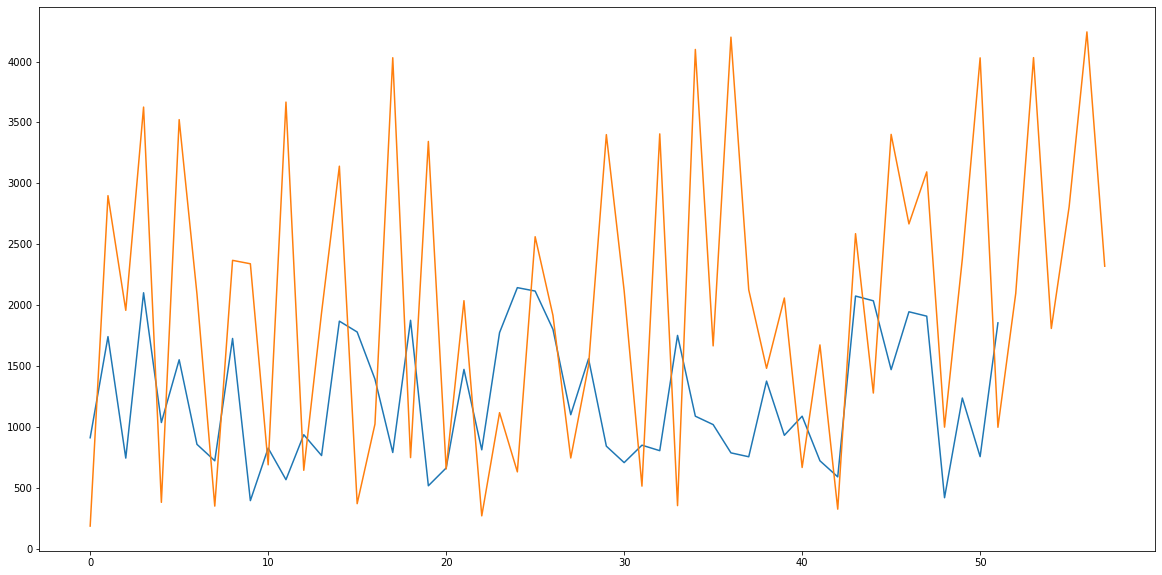

In [33]:
plot = plt.plot(dfHbbft.durationSendToConfirmation)
plot = plt.plot(dfAura.durationSendToConfirmation)

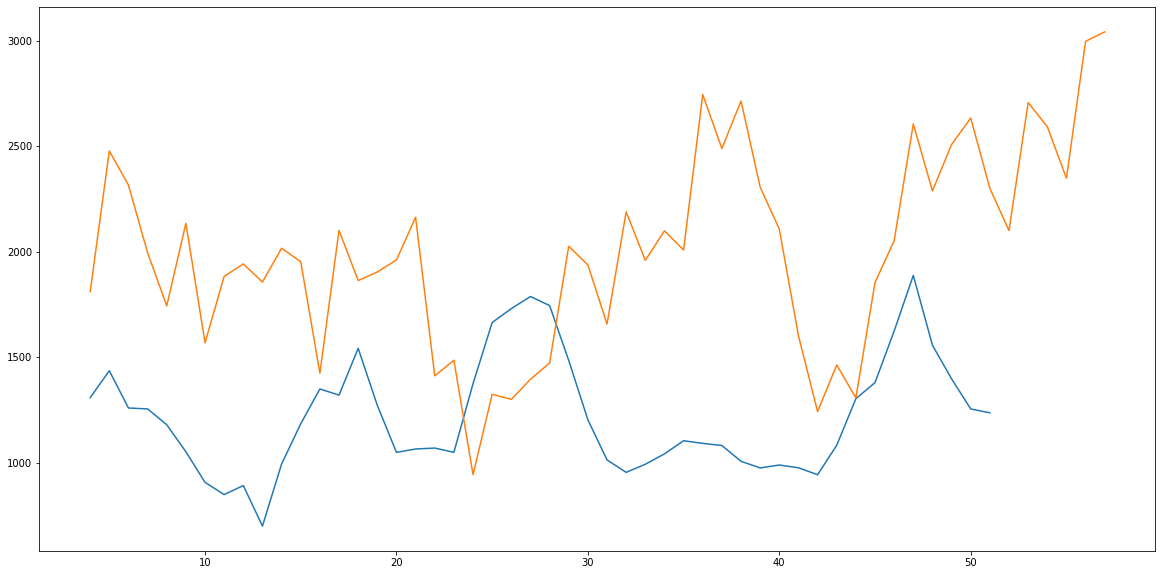

In [34]:
plot = plt.plot(dfHbbft.durationSendToConfirmation.rolling(window=5).mean())
plot = plt.plot(dfAura.durationSendToConfirmation.rolling(window=5).mean())